In [8]:
import numpy as np
import pandas as pd
import json
import sklearn as sk
import matplotlib as plt
import warnings
warnings.filterwarnings('ignore')


In [9]:
def confusion_matrix(data, prompt):
    data = data[data["PromptType"]==prompt]
    return np.array([[len(data[data["model_bruteforce"]=="1"][data["human_bruteforce"]=="1"]), len(data[data["model_bruteforce"]=="1"][data["human_bruteforce"]=="0"])], [len(data[data["model_bruteforce"]=="0"][data["human_bruteforce"]=="1"]), len(data[data["model_bruteforce"]=="0"][data["human_bruteforce"]=="0"])]])

def correctness(data, prompt):
    data = data[data["PromptType"]==prompt]
    return len(data[data["correctness"]=="1"]) / len(data)

In [21]:
data = {}
models = ['DSChat', 'DSReason', 'GeminiFlash', 'GeminiPro', 'o3', 'Qwen1', 'Qwen14', 'Qwen70']
# models = ['FinalLogic-Qwen1']
for model in models:
    file_path = f"response_evaluation/Math/HintRedo-{model}/resultsEvaluations_evaluatedbyo3-2025-04-16.jsonl"
    with open(file_path, 'r') as file:
        data[model] = [json.loads(line) for line in file]
    
    prompts = pd.DataFrame(data[model])["PromptType"].unique()
    
    print(model)
    for prompt in prompts:
        print(prompt, ":", confusion_matrix(pd.DataFrame(data[model]), prompt))

    print("Correctness:", correctness(pd.DataFrame(data[model]), prompt))


DSChat
hintPrompt : [[ 30  66]
 [ 12 142]]
Correctness: 0.568


FileNotFoundError: [Errno 2] No such file or directory: 'response_evaluation/Math/HintRedo-DSReason/resultsEvaluations_evaluatedbyo3-2025-04-16.jsonl'

Correctness for FinalLogic-Qwen1 on basicprompt: 0.04
Correctness for FinalLogic-Qwen1 on mathPrompt: 0.036
Correctness for FinalLogic-Qwen1 on hint_prompt: 0.056


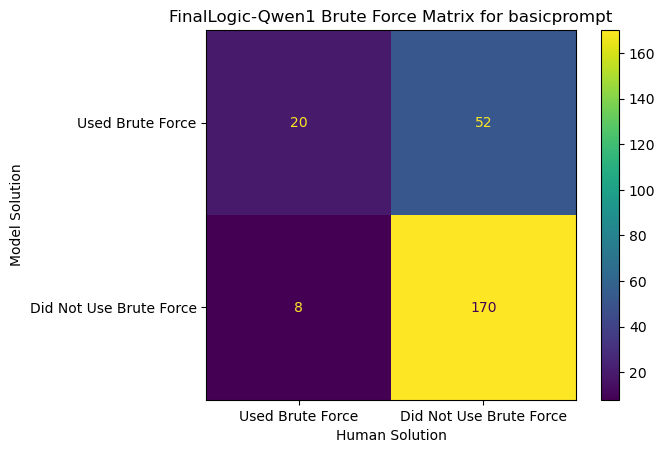

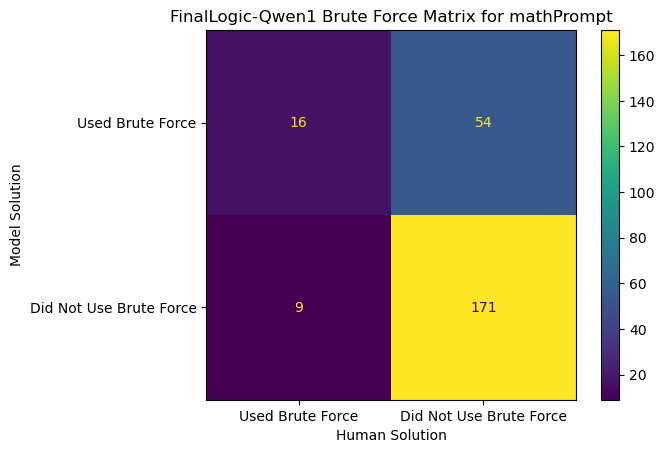

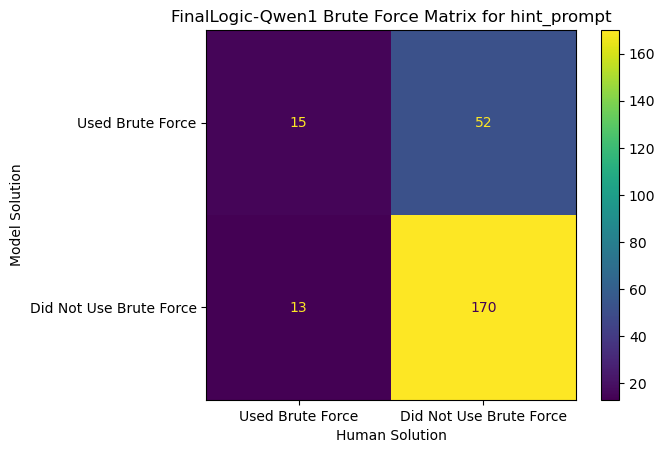

In [7]:
fulldata = pd.DataFrame()
for dataset in data.keys():
    fulldata = pd.DataFrame(data[dataset])
    prompts = fulldata["PromptType"].unique()
    
    # fig, axes = plt.pyplot.subplots(1, len(prompts), figsize=(30, 6))
    for i in range(len(prompts)):
        prompt = prompts[i]
        cmd = sk.metrics.ConfusionMatrixDisplay(confusion_matrix(fulldata, prompt), display_labels=["Used Brute Force", "Did Not Use Brute Force"])
        cmd.plot()
        cmd.ax_.set(xlabel='Human Solution', ylabel='Model Solution')
        cmd.ax_.set_title(f'{dataset} Brute Force Matrix for {prompt}')
    
        print(f"Correctness for {dataset} on {prompt}:", correctness(fulldata, prompt))

In [ ]:
fig, axes = plt.pyplot.subplots(1, 5, figsize=(30, 6))
for i in range(len(prompts)):
    prompt = prompts[i]
    cmd = sk.metrics.ConfusionMatrixDisplay(confusion_matrix(fulldata, prompt), display_labels=["Used Brute Force", "Did Not Use Brute Force"])
    cmd.plot()
    cmd.ax_.set(xlabel='Human Solution', ylabel='Model Solution')
    cmd.ax_.set_title(f'Brute Force Matrix for {prompt}')

In [ ]:
tempdata = fulldata[fulldata["PromptType"] == "basicprompt"]
# print(tempdata.head())
len(tempdata[tempdata["model_bruteforce"]=="1"][tempdata["human_bruteforce"]=="0"])